Central limit theorem(CLT) is one of the most widely used theorems in statistics. It is the core of hypothesis testing. It lets us use data to evaluate our ideas better.
If we have a population and we take sufficently large random samples from it, then the sample means will be approximately normally distributed. 
Take any distribution(need not be guassian). Every distribution will have a mean and variance. Take N samples(preferrably N>30) and compute its mean. If we plot the distribution, we get a guassian distribution, which has a mean roughly equal to population mean. 
So, to understand population mean and population variance, of any distribution, We just need to know that they are finite and well-defined.
CLT says that the sampling distribution of sample means for any popluation with a finite variance and finite mean is a guassian distribution, with a mean tending towards population mean.

https://www.kaggle.com/camnugent/california-housing-prices

Description of columns:
Longitude and latitude gives information about the acutal location of the house/property.
Housing_median_age tells us about how old the house is.
Total_rooms gives information about the acutal square foot area.
Total_bedroom gives information about the square foot area of the bedroom.
Median_House_Value gives information about the cost of the property.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#A normal continuous random variable.
from scipy.stats import norm 
%matplotlib inline

In [14]:
df=pd.read_csv('housing.csv') #https://www.kaggle.com/camnugent/california-housing-prices (Dataset link, I have also zipped the dataset along with the notebook while submitting assignment)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
df.columns #this gives the names of all the columns in the dataset.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [76]:
df.shape #This will give us the number of rows and columns from the dataset.

(20640, 10)

In [74]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [87]:
#mean, median, standard deviation, Q1, Q3, interquartile range
df["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

**Plotting boxplots for median house value
Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
The Concept of median, percentile, quantile.
NOTE:In the plot below, inter-quartile range is used in plotting the whiskers. 
Whiskers in the plot below do not correspond to the min and max values.**

C:\Users\praph\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


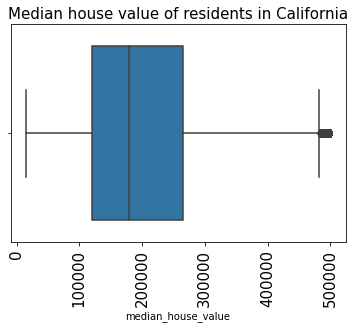

In [91]:
sns.boxplot(df['median_house_value'])
plt.title('Median house value of residents in California', fontsize = 15)
# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

#to display the plot
plt.show()

**We have many columns and I have choosen "median_house_value" column to demonstrate the distribution.**
This is a graph for simple statistics.

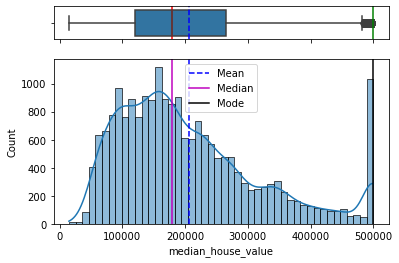

In [128]:
#Plotting the graph for the central tendency , this helps us understand the average of the data and how it is ditributed
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['median_house_value'].mean()
median=df['median_house_value'].median()
mode=df['median_house_value'].mode().values[0]

sns.boxplot(data=df, x="median_house_value", ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')
ax_box.axvline(median, color='r', linestyle='-')
ax_box.axvline(mode, color='g', linestyle='-')

sns.histplot(data=df, x="median_house_value", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='b', linestyle='--', label="Mean")
ax_hist.axvline(median, color='m', linestyle='-', label="Median")
ax_hist.axvline(mode, color='k', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [16]:
median_house_value= np.array(df.median_house_value)
median_house_value

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

**Now, let us look how the original distribution looks like(It doesn't necessarily need to be guassian)**

<AxesSubplot:title={'center':'California Median_House_Value'}, xlabel='Value in USD', ylabel='Density'>

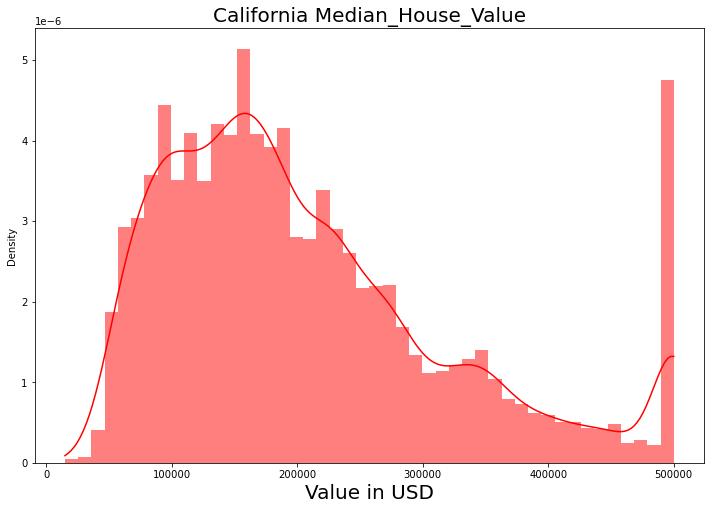

In [37]:
plt.figure(figsize=(12, 8))
plt.title('California Median_House_Value', size=20)
plt.xlabel('Value in USD', size=20)
sns.histplot(median_house_value, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

**As we can see from the above graph, it is randomly distributed. 
Now, according to Central limit theorem. We need to take sample means of the population.
properly normalized sum tends toward a normal distribution (a bell curve) even if the original variables themselves are not normally distributed.**

Text(0.5, 1.0, 'Distribution for sample size - 20000')

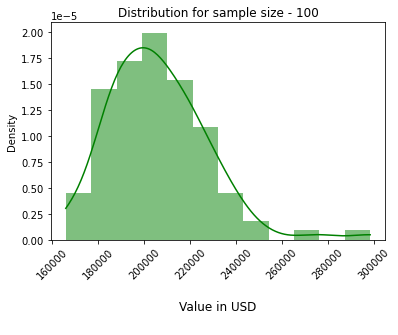

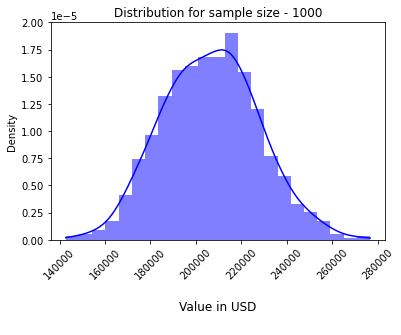

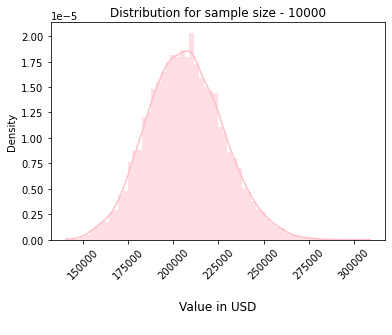

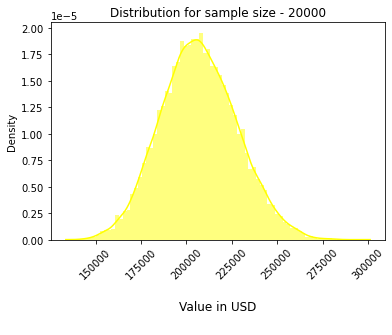

In [126]:

sample_num1 = 100
sample_num2 = 1000
sample_num3 = 10000
sample_num4 = 20000 #(My dataset has only 20,000 rows)
sample_size = 30 #N>30 is an empirical value 

mean_sample_values1 = []
mean_sample_values2 = []
mean_sample_values3 = []
mean_sample_values4 = []

#Here, for each and every sample, we are doing normally distributing it.
#I have also plotted the normal distribution.
#First, generating random samples:
for i in range(sample_num1):
    sample_mean = np.mean(np.random.choice(median_house_value, sample_size, replace=True))
    mean_sample_values1.append(sample_mean) 
plt.figure(figsize=(6, 4))
sns.histplot(mean_sample_values1, color="green", kde=True, stat="density", linewidth=0)
plt.xlabel('\nValue in USD\n', fontsize = 12)
plt.xticks(rotation=45)
plt.title("Distribution for sample size - 100", fontsize='12')


for i in range(sample_num2):
    sample_mean = np.mean(np.random.choice(median_house_value, sample_size, replace=True))
    mean_sample_values2.append(sample_mean) 
plt.figure(figsize=(6, 4))
sns.histplot(mean_sample_values2, color="blue", kde=True, stat="density", linewidth=0)
plt.xlabel('\nValue in USD\n', fontsize = 12)
plt.xticks(rotation=45)
plt.title("Distribution for sample size - 1000", fontsize='12')

for i in range(sample_num3):
    sample_mean = np.mean(np.random.choice(median_house_value, sample_size, replace=True))
    mean_sample_values3.append(sample_mean) 
plt.figure(figsize=(6, 4))
sns.histplot(mean_sample_values3, color="pink", kde=True, stat="density", linewidth=0)
plt.xlabel('\nValue in USD\n', fontsize = 12)
plt.xticks(rotation=45)
plt.title("Distribution for sample size - 10000", fontsize='12')

for i in range(sample_num4):
    sample_mean = np.mean(np.random.choice(median_house_value, sample_size, replace=True))
    mean_sample_values4.append(sample_mean) 
plt.figure(figsize=(6, 4))
sns.histplot(mean_sample_values4, color="yellow", kde=True, stat="density", linewidth=0)
plt.xlabel('\nValue in USD\n', fontsize = 12)
plt.xticks(rotation=45)
plt.title("Distribution for sample size - 20000", fontsize='12')

**Here, I am plotting all the sample size's normal distribution in one plot to see the difference.**

<AxesSubplot:title={'center':'Sample Mean of Median_House_Value'}, xlabel='Value in USD', ylabel='Density'>

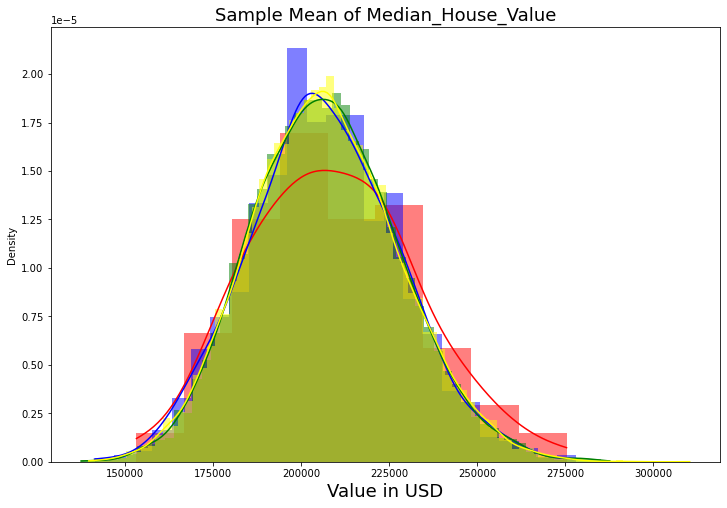

In [78]:
plt.figure(figsize=(12, 8))
plt.title('Sample Mean of Median_House_Value', size=18)
plt.xlabel('Value in USD', size=18)

sns.histplot(mean_sample_values1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(mean_sample_values2, color="blue", kde=True, stat="density", linewidth=0)
sns.histplot(mean_sample_values3, color="green", kde=True, stat="density", linewidth=0)
sns.histplot(mean_sample_values4, color="yellow", kde=True, stat="density", linewidth=0)

**As we can obeserve from the above graph, the more the sample size, the better the normal distribution looks.**

# My Observations:


**--This can be used to compare the property value with different states across the world to determine if the saying "California is expensive" is true and by how much.
--We can also predict the median_house_value using other features like latitude-longitude(The wealthy tend to live in certain areas and the middle income tend to live in not-so-expensive areas) and median_income.
--All the graphs above which are random sampled are normally distributed.
--It gives a very good understanding on how the normal distribution(bell shape) curve varies with change in sample size.**